### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [14]:
#librerias
import numpy as np
import pandas as pd
# Crear datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

In [15]:
#Creamos el dataset de prueba 
# make_regression del modulo sklearn.dataset : genera un conjunto de datos sinteticos para analisis de regresion

x,y = make_regression(n_samples = 1000, # numero de muestras en el conjunto de datos
                       n_features = 1, # numero de carascteristicas en el conjunto
                       noise = 2, #desviacion estandar del ruido gaussiano añadido a las muestras
                       n_informative = 1, # número de características informativas en el conjunto de datos 
                       random_state = 42) #El estado aleatorio para la generación de números aleatorios y la reproducibilidad de los resultados

new_data = np.append(x,y.reshape(-1,1),axis=1)
# devuelve una tupla 
new_data.shape

(1000, 2)

In [16]:
#Paso los datos a un dataframe
data = pd.DataFrame(new_data, columns=['X', 'Y']) #Y: target
data

,X,Y
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314
...,...,...
995,-1.918771,-30.210145
996,0.482472,9.182647
997,0.241962,4.855134
998,1.366874,25.785771


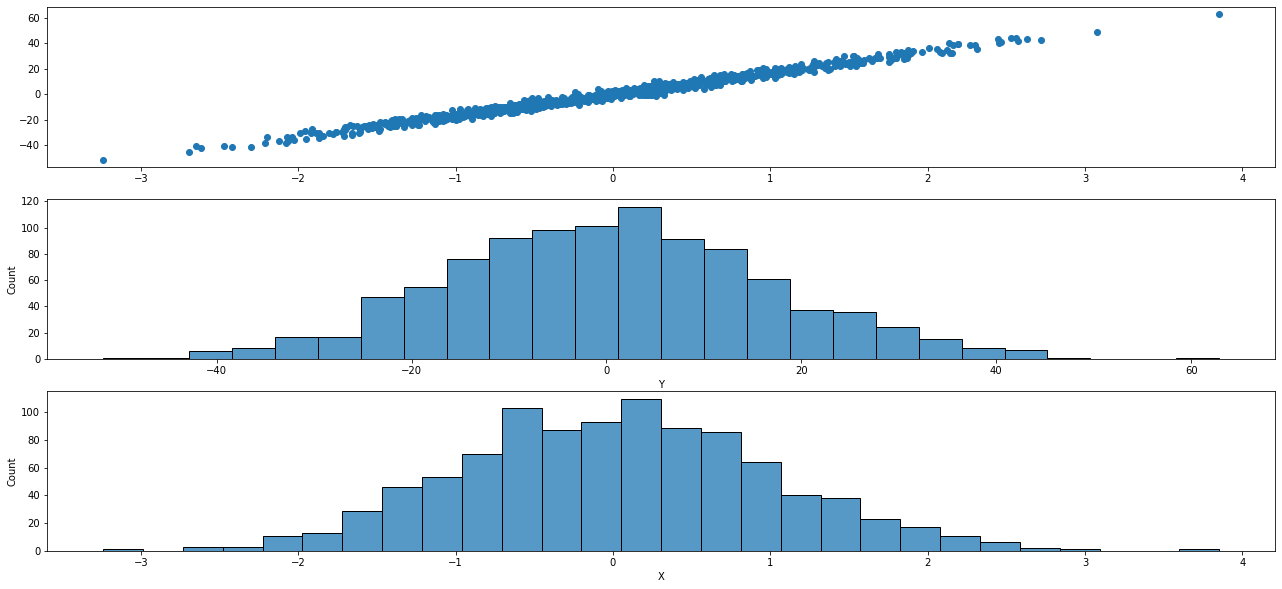

In [17]:
#grafico
fig,axes = plt.subplots(3,figsize=(22,10))
axes[0].scatter(data['X'],data['Y'])
sns.histplot(data['Y'], ax=axes[1]); #Muestra con que frecuencia aparecen los valores Y
sns.histplot(data['X'], ax=axes[2]); #Muestra con que frecuencia aparecen los valores X


In [18]:
#Recibo dataframe los porcentanje de train , validation 
def split(data,p_train,p_validation):
   # feature
   X= data['X']
   Y= data['Y']
   n_muestras= X.shape[0]

   #Mezclara los indices aleatoriamente
   permuted_idxs= np.random.permutation(n_muestras)
   #permuted_idxs 

   #Determinar los tamaños de cada conjunto
   train_size = int(p_train * n_muestras)
   valid_size = int(p_validation * n_muestras)
   test_size = n_muestras - train_size - valid_size

   # Dividir los índices en conjuntos de entrenamiento, validación y prueba
   train_idxs = permuted_idxs[:train_size]
   valid_idxs = permuted_idxs[train_size:train_size+valid_size]
   test_idxs = permuted_idxs[-test_size:]
   
   # Extraer las filas correspondientes a cada conjunto
   X_train = X[train_idxs]
   Y_train = y[train_idxs]
   X_valid = X[valid_idxs]
   Y_valid = y[valid_idxs]
   X_test = X[test_idxs]
   Y_test = y[test_idxs]

   return X_train, X_valid, X_test, Y_train, Y_valid, Y_test

[X_train, X_valid, X_test, Y_train, Y_valid, Y_test]=split(data, 0.7,0.2)

#print(X_train ,Y_train)

#print(X_valid,Y_valid)

#print(X_test,Y_test)

  
  